In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np

New implementation of RK4 function

rk4 estimate vs actual:
2.666666666666669


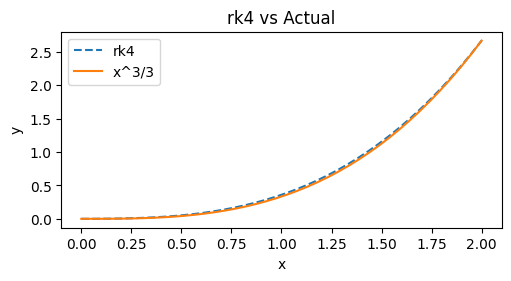

In [6]:
# Params:
#   x0: starting x pos
#   y0: starting y pos
#   x: target x pos
#   h: step size
# find ~y for given x using derivative
def rk4(x0, y0, x, h):
    # find range based on step size, and init y to y0
    n = (int)((x-x0)/h)
    y = y0

    # from 0 to n in steps of size h
    for i in range(n):
        # slope at beginning of interval
        k1 = h*dydx(x0      , y           )
        # slope at midpoint
        k2 = h*dydx(x0 + h*0.5, y + k1*0.5)
        # alternate slope at midpoint
        k3 = h*dydx(x0 + h*0.5, y + k2*0.5)
        # slope at end of interval
        k4 = h*dydx(x0 + h  , y + k3      )
        # update y
        y += ((k1 + 2*k2 + 2*k3 + k4)/6)
        # update x
        x0 = x0 + h
    return y

# same as rk4 above, but returns array of data to plot
def rk4_plot(x0, y0, x, h):
    # find range based on step size, and init y to y0
    n = (int)((x-x0)/h)
    y = y0
    
    # make array of zeros of size n
    y_data = np.zeros(n)

    # from 0 to n in steps of size h, update rk4 est.
    for i in range(0,n):
        k1 = h * dydx(x0      , y           )
        k2 = h * dydx(x0 + h*0.5, y + k1*0.5)
        k3 = h * dydx(x0 + h*0.5, y + k2*0.5)
        k4 = h * dydx(x0 + h  , y + k3      )
        # update y
        y += ((k1 + 2*k2 + 2*k3 + k4)/6)
        # update x
        x0 = x0 + h
        # log y_data into array
        y_data[i] = y
    return y_data

# derivative we want to solve
def dydx(x, y):
    return x**2

# find y @ x = 2, starting from x0 = 0, y = 0, and step size of 0.05
x0 = 0
y0 = 0
x = 2
h = 0.05
print("rk4 estimate vs actual:")
print(rk4(x0, y0, x, h))

# taken from matplotlib documentation
x_plt = np.linspace(0, x, (int)(2/h))
y_plot = rk4_plot(x0, y0, x, h)

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x_plt, y_plot, '--', label='rk4') 
ax.plot(x_plt, x_plt**3/3, label='x^3/3')
ax.set_xlabel('x')
ax.set_ylabel('y')  
ax.set_title("rk4 vs Actual")
ax.legend()

# refs
# https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
# https://www.geeksforgeeks.org/runge-kutta-4th-order-method-solve-differential-equation/
# https://www.codesansar.com/numerical-methods/runge-kutta-fourth-order-rk4-python-program.htm

A file "z_0.000.hdf5" is refered to as a cooling talbe, so I looked up hdf5 python package and found one that works with hdf5 files. Just messing around with it and figuring it out.

In [80]:
import h5py
f = h5py.File('z_0.000.hdf5', 'r')
# shows data sets that the hdf5 file contains
print(list(f.keys()))

# this file has data for Calcium, Carbon, Header,
# Iron, Magnesium, Metal_free, Neon, Nitrogen, Oxygen, 
# Silicon, Solar, Sulphur, and Total_Metals

# can use list on subgroups too
dset = f['Carbon']
print(list(dset.keys()))

# Caclium has Hydrogen_density_bins, Net_Cooling, and Temperature_bins data
dset_sub = dset['Hydrogen_density_bins']
print(dset_sub.shape, dset_sub.dtype)
# size 41, float32

dset_sub = dset['Net_Cooling']
print(dset_sub.shape, dset_sub.dtype)
# size 7216, shape [176,41], float32

dset_sub = dset['Temperature_bins']
print(dset_sub.shape, dset_sub.dtype)
# size 176, float32

# all metals have same sizes and data types
# to access data by turing it into a np arr, we can use the following code
ds_arr = dset['Net_Cooling'][()]  # returns as a numpy array
print(ds_arr.shape)


['Calcium', 'Carbon', 'Header', 'Iron', 'Magnesium', 'Metal_free', 'Neon', 'Nitrogen', 'Oxygen', 'Silicon', 'Solar', 'Sulphur', 'Total_Metals']
['Hydrogen_density_bins', 'Net_Cooling', 'Temperature_bins']
(41,) float32
(176, 41) float32
(176,) float32
(176, 41)


General procedure in thompson.py file is listed below. Need to look further into escape velocity, velocity dispersion, and enclosed mass

Questions:\
What formula are we using for enclosed mass?

Escape velocity equation; there is one given that says v_e = 2*G*M(r)/r.

Also sentence saying "assuming a singular isothermal sphere [v_e(r) = 2 sigma] where sigma is velocity dispersion and equal to 200 km/s. This value is used in the code, but I'm not sure what the function that is using it does with it.

Can the derivatives (eq 27-29) be simplified (i.e. part of the equation 27 and 28 is (D)/(C_v * T), where D = k_B * T / m_p, C_v = 3*k_B/(2*m_p) so wouldn't T, m_p, and k_b cancel out)?

There is a commented out "calc_cooling()" function that is called but never defined. What does this function entail?

In [ ]:
### Define Physical Constants ###

# ---- all using cgs units ----
# grav constant
# boltzman const
# mass of proton
# M* = 10 * Mass of sun * yr^-1
# ideal gas law for adibatic monotomic gas
# mol mass? just set to 1 so not sure if  incorrect or uneccesary

# SNe thermalization efficiency, alpha, also set to 1
# mass-loading factor, beta
# velocity dispersion, need to read up on this
# metallicity defined twice, once as xi, once as metallicity, both set to 1
# "steradians [opening angle for wind]," omega = 4pi
# stepsize annotated as "pc", set to .2 * 10^18 * 3.086


### Read in a cooling table from Wiersma (2009) in HD5 format ###

# Working on implementing h5py above to read data from tables, currently can access cooling table


### Compute the cooling rate for given temperature and density ###

# need to figure out how to use the cooling table


### Compute the escape velocity from a point in a singular isothermal ###

# 'local' escape velocity v_e
# v_e = 2 * G * M(r)/r
# M(r) is the enclosed mass

# useful source
# https://www.sr.bham.ac.uk/~tjp/FEG/hand2.pdf


### Compute the derivatives dv/dr, drho/dr, dT/dr given input r and initial values ###
# y constains [v,rho,T] in that order

Original compiled python project. I've deleted most of the global variables and am working on sorting through / organizing the comments

In [ ]:
##thompson.py

#Recheck for:
		#Values of variables
		#Redundancy in defining global variable in case of errors
		###!!!!!!!!!!!!!!--> Sign of caution and confusion while translating from IDL
		###verify if d implies power of 10

import numpy as np
import matplotlib.pyplot as plt

#8888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888

#Define Physical Constants

gravconst=np.multiply(6.67,np.power(10.,-8.))   											# Newton's Gravitational constant in cgs units
kb = np.multiply(1.38,np.power(10.,-16.)) 													# Boltzmann constant in cgs unit
mp = np.multiply(1.67,np.power(10.,-24.)) 													# mass of a proton in cgs units
Msunyr = np.divide(np.multiply(2.,np.power(10.,33.)),np.multiply(3.15,np.power(10.,7.)))
gamma = np.divide(5.,3.)                  													# ideal Gas law for a non-relativistic gas; this is for adiabatic monotomic gas
molmass = 1.

#888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888

alpha=1.0                          		 													# SNe thermalization efficiency
beta =0.2                			 														# mass-loading factor
veldisp=np.multiply(200.,np.power(10.,5.))       											# cm/s [isothermal sphere velocity dispersion] ####!!!!!!!!!!
xi=1.0                   		        													# metallicity term for cooling function
omega=np.multiply(4.,np.pi)             	 												# steradians [opening angle for wind]
stepsize=np.multiply(np.multiply(0.2,np.power(10,18.)),3.086)    							# pc
metallicity=1.0 				 

#88888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888

#Read in a cooling table from Wiersma (2009) in HD5 format

#8888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888

#Compute the cooling rate for given temperature and density

#88888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888

#Compute the escape velocity from a point in a singular isothermal
# sphere with some velocity dispersion
def vesc(r):
	#calculations
	#Potential = 4*!pi*gravconst*rho_c*r_c^2*alog(r/r_c) = v_circ^2 * alog(r/r_c)
  	#v_esc = sqrt(2*abs(potential))
  	#We are given the velocity dispersion, and know that
  	#rho(r) = veldisp^2./(2*!pi*gravconst*r^2) = rho_0 * (r/r_0)^(-2)
  	#so, set rho_c and solve for r_c (or vice versa)
	#rho_c = 1.10d-23 ;; what we get if we set r_c = 3 kpc
	rho_c=np.multiply(4.,np.power(10.,-22.))
	r_c=np.sqrt(np.divide(np.multiply(2.,np.power(veldisp,2.)),np.multiply(4.*gravconst,rho_c*np.pi)))
	Phi=np.absolute(np.multiply(np.multiply(2.,np.power(veldisp,2.)),np.log(np.divide(r,r_c))))
	return np.sqrt(np.multiply(2.,Phi))

#8888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888

def cssquared(T):
	return np.divide(np.multiply(np.multiply(gamma,kb),T),np.multiply(molmass,mp))

#8888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888
 
# Compute the derivatives dv/dr, drho/dr, dT/dr given input r and
# initial values. y constains [v,rho,T] in thanot order
#  Based on Thompson et al. (2016)

def dydx(r,y): ##!!!!!!!!!!!
	v= y[0]
	rho=y[1]
	T=y[2]
	n=np.divide(rho,np.multiply(molmass,mp)) # cm^-3
	d=np.divide(np.multiply(kb,T),mp)
	cv=np.divide(np.multiply(1.5,kb),mp)

	#velocities
	vsq =np.power(v,2)
	cssq = cssquared(T)
	vesq = np.power(vesc(r),2)

	#cooling_rate per gram
	#qdot = -(calc_cooling(T,n)*n)**2/rho
	#qdot untill hdf is handled
	qdot = 0.005 #random value !!!!!!!!!!!!!!!!!!!!!!!
	
##	"To be corrected as required by numpy package later"
	# dv/dr
	dVdr   = v/(2.*r) * (vesq-4.*cssq)/(cssq-vsq) + d/(cv*T)*(qdot/(cssq-vsq))
  	# drho/dr
  	dRhodr = 2.*rho/r * (vsq-vesq/4.)/(cssq-vsq) - rho/v*(d/(cv*T))*(qdot/(cssq-vsq))
  	# dT/dr
  	dTdr   = 2./r*(d/cv)*(vsq-vesq/4.)/(cssq-vsq) + (qdot/(cv*v))*(cssq/gamma**2.-vsq)/(cssq-vsq)
	
	return [dVdr, dRhodr, dTdr]

#88888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888
	
def main():
	# Set up the constant in global variables (edit above, or redefine below)
	#read cooling table 
	#hdffile = open.("z_0.000.hdf5")
##	"Use of constant cooling rate is used untill the "

	#Determine initial values of v, T, and rho from the CC85 solution
	#at r=R, where R = size of the wind launching zone (~300 pc for
	#M82 or NGC 253), and Mach number = 1 at r=R

	r0   = 300.                   # pc
	rend = 50.                    # kpc
	sfr  = 10.                    # Msun/yr
	edot = np.multiply(np.multiply(np.multiply(np.power(10,41),alpha),sfr),3)   # erg/s, input rate of hot gas thermal energy
	#print(edot,"edot printin for testig")
	mdot = np.multiply(np.multiply(Msunyr,beta),sfr)        # g/s, outflow rate
	#print(mdot,"mdot printin for testig")
	r0   = np.multiply(r0,np.multiply(3.086,np.power(10.,18.)))   #convert to cm
	#print(r0, "r0 printing for testing")

	# Because the derivatives (see above) have singularities at v=c_s,
   	# we cannot use r=R exactly. Instead, solve at v/c_s=1.001 
  	#(note: v/c_s < 1 primes the derivatives in the wrong direction)
 	machnum = 1.001

	#"THE THREE MAIN INITIAL VALUES"
	v0 = np.sqrt(np.multiply(np.divide(np.multiply(2.,np.power(machnum,2.)),np.add(np.power(machnum,2.),np.divide(2.,np.subtract(gamma,1.)))),np.divide(edot,mdot)))
	rho0 = np.divide(mdot,np.multiply(np.multiply(omega,np.power(r0,2.)),v0))
	T0   = np.multiply(np.multiply(molmass,np.divide(mp,np.multiply(gamma,kb))),np.power(np.divide(v0,machnum),2.))
	
	#initialize initial value for y and r to be used for rk4
	y = [v0,rho0,T0]
  	r = r0
        #print y, r, stepsize #---> EXCEPT FOR CORRECT VALUE PROBLEM, PROGRAM WORKS TILL THIS POINT

        #define range for iteration inside rk4
        #n = int(((4.086**21)*rend-r0)/stepsize
        #print(r0, y, r, stepsize) #Initial Parameters works, the problem might be with differential equations
        #print dydx(r0,y) #dydx works!! check to see if the problem is in acessing dydx from rungeKutta

        from rk4 import rungeKutta4
        print(rungeKutta4(r0, y, r, stepsize))
        
	#plot using matplotlib.pyplot as plt
	#plt.plot(V,R)
        #plt.show()

#End of Functions~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

main()